In [35]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [36]:
filename = "datasets/original_dataset.xlsx"
df = pd.read_excel(filename, engine='openpyxl')

df

,UniqueID,submission_year,target,TrainVal,Long_1,Long_2,Long_3,Long_4,Long_5,Long_6,...,Short_1,Short_2,Short_3,Short_4,Short_5,Short_6,Short_7,Short_8,Short_9,Short_10
0,984TAH,2015,0,Train_60,1800.0,6.0,0.0,221.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410VKN,2015,0,Val_40,5700.0,8.0,0.0,221.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,394ETK,2015,1,Train_60,700.0,1.0,0.0,147.0,17.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,036KQK,2015,0,Train_60,1700.0,2.0,0.0,461.0,187.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,996RNP,2015,0,Train_60,600.0,3.0,0.0,96.0,30.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,757VJZ,2017,0,Train_60,3000.0,14.0,0.0,414.0,37.0,10.5,...,0.138413,0.496467,71.118364,8192.698333,83.009946,184541.42500,131154.80,48.671647,0.061366,0.666667
4595,538JZF,2017,1,Train_60,1600.0,0.0,NaN,338.0,NaN,1.0,...,0.108609,0.630414,50.562971,41071.880000,73.326164,88518.18143,47621.34,58.136132,0.416919,0.000000
4596,648WHI,2017,1,Val_40,100.0,3.0,6741.0,281.0,198.0,3.0,...,1.341142,0.985568,41.803426,1587.646667,34.919227,35035.94000,32704.26,11.122347,0.064327,0.666667
4597,899YZB,2017,1,Val_40,300.0,0.0,9411.0,173.0,44.0,1.0,...,1.419549,1.317842,48.831847,15061.066670,42.615211,186000.48000,169718.98,39.008325,0.053133,0.666667


In [37]:
# Separate data into training and validation sets
train_df = df[df['TrainVal'] == 'Train_60']
val_df = df[df['TrainVal'] == 'Val_40']

# Separate features and target variable
X_train_old = train_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal',
                                 'Short_1','Short_2','Short_3','Short_4','Short_5','Short_6',
                                 'Short_7','Short_8','Short_9', 'Short_10'])
X_train_new = train_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal',
                                 'Long_1','Long_2','Long_3','Long_4','Long_5','Long_6',
                                 'Long_7','Long_8','Long_9', 'Long_10'])
X_train_full= train_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal'])
y_train = train_df['target']

X_val_old = val_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal',
                             'Short_1','Short_2','Short_3','Short_4','Short_5',
                             'Short_6','Short_7','Short_8','Short_9', 'Short_10'])
X_val_new = val_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal',
                                 'Long_1','Long_2','Long_3','Long_4','Long_5','Long_6',
                                 'Long_7','Long_8','Long_9', 'Long_10'])
X_val_full= val_df.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal'])
y_val = val_df['target']

# Model 1 (Old data)

In [38]:
# Train the XGBoost model with hyper parameter tuning

# Define the parameter grid
param_grid_old = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}
clf_old = xgb.XGBClassifier()
grid_search_old = GridSearchCV(clf_old, param_grid_old, scoring='roc_auc', cv=3, verbose=1)
grid_search_old.fit(X_train_old, y_train)

# Best hyperparameters
print(grid_search_old.best_params_)

best_clf_old = grid_search_old.best_estimator_

# Predict using the best model
# y_pred = best_clf.predict(X_val_new)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}


In [39]:
train_scores_old = best_clf_old.predict_proba(X_train_old)[:, 1]
val_scores_old = best_clf_old.predict_proba(X_val_old)[:, 1]

# Model 2 (New data)

In [40]:
# Train the XGBoost model with hyper parameter tuning

# Define the parameter grid
param_grid_new = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}
clf_new = xgb.XGBClassifier()
grid_search_new = GridSearchCV(clf_new, param_grid_new, scoring='roc_auc', cv=3, verbose=1)
grid_search_new.fit(X_train_new, y_train)

# Best hyperparameters
print(grid_search_new.best_params_)

best_clf_new = grid_search_new.best_estimator_

# Predict using the best model
# y_pred = best_clf.predict(X_val_new)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}


In [41]:
train_scores_new = best_clf_new.predict_proba(X_train_new)[:, 1]
val_scores_new = best_clf_new.predict_proba(X_val_new)[:, 1]

# Model 3 (New + Old data)

In [42]:
# Train the XGBoost model with hyper parameter tuning

# Define the parameter grid
param_grid_full = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}
clf_full = xgb.XGBClassifier()
grid_search_full = GridSearchCV(clf_full, param_grid_full, scoring='roc_auc', cv=3, verbose=1)
grid_search_full.fit(X_train_full, y_train)

# Best hyperparameters
print(grid_search_full.best_params_)

best_clf_full = grid_search_full.best_estimator_

# Predict using the best model
# y_pred = best_clf.predict(X_val_new)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [43]:
train_scores_full = best_clf_full.predict_proba(X_train_full)[:, 1]
val_scores_full = best_clf_full.predict_proba(X_val_full)[:, 1]

# Merging probabilities from three models

In [44]:

# Create new dataframes or copies of the original dataframes to store the scores
train_df_old = X_train_old.copy()
val_df_old = X_val_old.copy()

train_df_new = X_train_new.copy()
val_df_new = X_val_new.copy()

train_df_full = X_train_full.copy()
val_df_full = X_val_full.copy()

train_df_old['UniqueID'] = train_df['UniqueID']
val_df_old['UniqueID'] = val_df['UniqueID']

train_df_new['UniqueID'] = train_df['UniqueID']
val_df_new['UniqueID'] = val_df['UniqueID']

train_df_full['UniqueID'] = train_df['UniqueID']
val_df_full['UniqueID'] = val_df['UniqueID']

# Assign the scores to new columns in the corresponding dataframes
train_df_old['Probability (Model old)'] = train_scores_old
val_df_old['Probability (Model old)'] = val_scores_old

train_df_new['Probability (Model new)'] = train_scores_new
val_df_new['Probability (Model new)'] = val_scores_new

train_df_full['Probability (Model full)'] = train_scores_full
val_df_full['Probability (Model full)'] = val_scores_full

# Now when you concatenate, the resulting dataframes will have separate columns for each model's scores
all_data_with_scores_old = pd.concat([train_df_old, val_df_old], axis=0)
all_data_with_scores_new = pd.concat([train_df_new, val_df_new], axis=0)
all_data_with_scores_full = pd.concat([train_df_full, val_df_full], axis=0)
# Merge the score columns from all_data_with_scores_old, all_data_with_scores_new, and all_data_with_scores_full into df:
stage_2_df = df.copy()  # Create a copy of df to avoid modifying it in-place
stage_2_df = pd.merge(stage_2_df, all_data_with_scores_old[['UniqueID', 'Probability (Model old)']], on='UniqueID', how='left')
stage_2_df = pd.merge(stage_2_df, all_data_with_scores_new[['UniqueID', 'Probability (Model new)']], on='UniqueID', how='left')
stage_2_df = pd.merge(stage_2_df, all_data_with_scores_full[['UniqueID', 'Probability (Model full)']], on='UniqueID', how='left')
stage_2_df

,UniqueID,submission_year,target,TrainVal,Long_1,Long_2,Long_3,Long_4,Long_5,Long_6,...,Short_4,Short_5,Short_6,Short_7,Short_8,Short_9,Short_10,Probability (Model old),Probability (Model new),Probability (Model full)
0,984TAH,2015,0,Train_60,1800.0,6.0,0.0,221.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414460,0.394917,0.287892
1,410VKN,2015,0,Val_40,5700.0,8.0,0.0,221.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453624,0.394917,0.352568
2,394ETK,2015,1,Train_60,700.0,1.0,0.0,147.0,17.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388046,0.394917,0.254349
3,036KQK,2015,0,Train_60,1700.0,2.0,0.0,461.0,187.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.373537,0.394917,0.164835
4,996RNP,2015,0,Train_60,600.0,3.0,0.0,96.0,30.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.396929,0.394917,0.292500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,757VJZ,2017,0,Train_60,3000.0,14.0,0.0,414.0,37.0,10.5,...,8192.698333,83.009946,184541.42500,131154.80,48.671647,0.061366,0.666667,0.380085,0.440142,0.245470
4595,538JZF,2017,1,Train_60,1600.0,0.0,NaN,338.0,NaN,1.0,...,41071.880000,73.326164,88518.18143,47621.34,58.136132,0.416919,0.000000,0.372056,0.409351,0.274810
4596,648WHI,2017,1,Val_40,100.0,3.0,6741.0,281.0,198.0,3.0,...,1587.646667,34.919227,35035.94000,32704.26,11.122347,0.064327,0.666667,0.443616,0.361476,0.328241
4597,899YZB,2017,1,Val_40,300.0,0.0,9411.0,173.0,44.0,1.0,...,15061.066670,42.615211,186000.48000,169718.98,39.008325,0.053133,0.666667,0.434775,0.364307,0.410174


# Use model output to build stacking model

In [45]:
aggregate_df = stage_2_df.drop(columns=['Short_1','Short_2','Short_3','Short_4','Short_5','Short_6',
                                 'Short_7','Short_8','Short_9', 'Short_10',
                                  'Long_1','Long_2','Long_3','Long_4','Long_5','Long_6',
                                 'Long_7','Long_8','Long_9', 'Long_10'])
aggregate_df

,UniqueID,submission_year,target,TrainVal,Probability (Model old),Probability (Model new),Probability (Model full)
0,984TAH,2015,0,Train_60,0.414460,0.394917,0.287892
1,410VKN,2015,0,Val_40,0.453624,0.394917,0.352568
2,394ETK,2015,1,Train_60,0.388046,0.394917,0.254349
3,036KQK,2015,0,Train_60,0.373537,0.394917,0.164835
4,996RNP,2015,0,Train_60,0.396929,0.394917,0.292500
...,...,...,...,...,...,...,...
4594,757VJZ,2017,0,Train_60,0.380085,0.440142,0.245470
4595,538JZF,2017,1,Train_60,0.372056,0.409351,0.274810
4596,648WHI,2017,1,Val_40,0.443616,0.361476,0.328241
4597,899YZB,2017,1,Val_40,0.434775,0.364307,0.410174


In [46]:
# Separate data into training and validation sets
train_df_2 = aggregate_df[aggregate_df['TrainVal'] == 'Train_60']
val_df_2 = aggregate_df[aggregate_df['TrainVal'] == 'Val_40']

# Separate features and target variable
X_train_2 = train_df_2.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal'])
y_train_2 = train_df_2['target']

X_val_2 = val_df_2.drop(columns=['UniqueID', 'submission_year', 'target', 'TrainVal'])
y_val_2 = val_df_2['target']

In [47]:
# Train the XGBoost model with hyper parameter tuning

# Define the parameter grid
param_grid_2 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}
clf_2 = xgb.XGBClassifier()
grid_search_2 = GridSearchCV(clf_2, param_grid_2, scoring='roc_auc', cv=3, verbose=1)
grid_search_2.fit(X_train_2, y_train_2)

# Best hyperparameters
print(grid_search_2.best_params_)

best_clf_2 = grid_search_2.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.9}


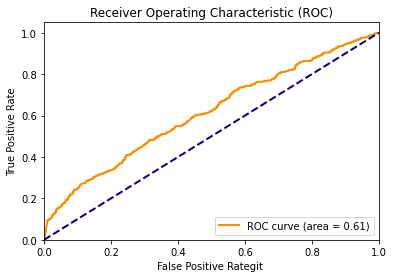

In [48]:
from sklearn.metrics import roc_curve, auc

# best_clf.fit(X_train_new, y_train)

# Predict on validation set

y_pred_2 = best_clf_2.predict_proba(X_val_2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val_2, y_pred_2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rategit ')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./images/ensembling.jpg')
plt.show()